5.Plot the distribution of users by frequency of their 90-day repeat (Number of times user repeated within first 90 days)

In [259]:
import pandas as pd 
from collections import OrderedDict
import pickle
df = pd.read_pickle("features.pickle")
df.head(20)

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),year,month,day,days_since_last_event,DateofServiceRequested,diff_minutes,days_sincelast_event,DateofBooking,latest_cart,labels,thirty,ninty
0,BBCHH,1,2018-05-20,2018-05-21,D,14,2018,5,20,NaT,2018-05-21,1 days,0.0,2018-05-20,"[2018-05-20 00:00:00, 2018-09-23 00:00:00]",126.0,0,0
1,CHWFD,1,2018-09-23,2018-09-23,C,8,2018,9,23,126 days,2018-09-23,0 days,126.0,2018-09-23,"[2018-05-20 00:00:00, 2018-09-23 00:00:00]",0.0,0,0
2,DYDMF,2,2018-11-10,2018-11-13,C,11,2018,11,10,NaT,2018-11-13,3 days,0.0,2018-11-10,[2018-11-10 00:00:00],0.0,0,0
3,EZYSA,3,2018-04-12,2018-04-16,B,8,2018,4,12,NaT,2018-04-16,4 days,0.0,2018-04-12,"[2018-04-12 00:00:00, 2018-08-05 00:00:00]",115.0,0,0
4,HWAKX,3,2018-08-05,2018-08-06,B,11,2018,8,5,115 days,2018-08-06,1 days,115.0,2018-08-05,"[2018-04-12 00:00:00, 2018-08-05 00:00:00]",0.0,0,0
5,YRKFO,4,2018-03-02,2018-03-05,A,13,2018,3,2,NaT,2018-03-05,3 days,0.0,2018-03-02,[2018-03-02 00:00:00],0.0,0,0
6,JSFWY,5,2018-01-06,2018-01-07,C,14,2018,1,6,NaT,2018-01-07,1 days,0.0,2018-01-06,[2018-01-06 00:00:00],0.0,0,0
7,GTLXK,6,2018-07-18,2018-07-21,B,13,2018,7,18,NaT,2018-07-21,3 days,0.0,2018-07-18,[2018-07-18 00:00:00],0.0,0,0
8,BGNZX,7,2017-12-07,2017-12-12,D,16,2017,12,7,NaT,2017-12-12,5 days,0.0,2017-12-07,[2017-12-07 00:00:00],0.0,0,0
9,TDVFU,8,2018-11-29,2018-11-29,C,10,2018,11,29,NaT,2018-11-29,0 days,0.0,2018-11-29,"[2018-11-29 00:00:00, 2018-11-30 00:00:00]",1.0,1,1


In [260]:
df.groupby('Profile ID')['DateofBooking'].nth(0)

Profile ID
1       2018-05-20
2       2018-11-10
3       2018-04-12
4       2018-03-02
5       2018-01-06
6       2018-07-18
7       2017-12-07
8       2018-11-29
9       2018-03-08
10      2018-10-26
11      2018-10-03
12      2018-02-20
13      2018-03-21
14      2018-04-30
15      2018-08-18
16      2018-09-06
17      2018-04-04
18      2017-12-30
19      2018-02-06
20      2018-06-13
21      2018-11-27
22      2018-01-29
23      2018-07-29
24      2018-07-03
25      2017-12-30
26      2018-09-25
27      2018-10-18
28      2018-10-23
29      2018-02-22
30      2018-05-15
           ...    
16682   2018-05-22
16683   2018-01-24
16684   2018-11-19
16685   2018-11-30
16686   2018-09-28
16687   2018-02-05
16688   2018-03-07
16689   2018-05-06
16690   2018-10-03
16691   2018-03-28
16692   2018-01-25
16693   2017-12-05
16694   2018-11-13
16695   2018-02-20
16696   2018-02-05
16697   2018-09-07
16698   2018-01-27
16699   2018-03-18
16700   2018-10-02
16701   2018-07-18
16702   2018-04-25
1

In [261]:
def func(x):
    return x[0]
    
#df['dayssincelast_event']=df.sort_values(by=['Profile ID', 'Date_of_Booking'],ascending=False).groupby('Profile ID')
#['Date_of_Booking'].nth(0)



df['date_of_first_event']=df['latest_cart'].map(func)


In [262]:
df['dayssince_firstorder'] = (df['DateofBooking'] - df['date_of_first_event'])

In [263]:
df.head(5)

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),year,month,day,days_since_last_event,DateofServiceRequested,diff_minutes,days_sincelast_event,DateofBooking,latest_cart,labels,thirty,ninty,date_of_first_event,dayssince_firstorder
0,BBCHH,1,2018-05-20,2018-05-21,D,14,2018,5,20,NaT,2018-05-21,1 days,0.0,2018-05-20,"[2018-05-20 00:00:00, 2018-09-23 00:00:00]",126.0,0,0,2018-05-20,0 days
1,CHWFD,1,2018-09-23,2018-09-23,C,8,2018,9,23,126 days,2018-09-23,0 days,126.0,2018-09-23,"[2018-05-20 00:00:00, 2018-09-23 00:00:00]",0.0,0,0,2018-05-20,126 days
2,DYDMF,2,2018-11-10,2018-11-13,C,11,2018,11,10,NaT,2018-11-13,3 days,0.0,2018-11-10,[2018-11-10 00:00:00],0.0,0,0,2018-11-10,0 days
3,EZYSA,3,2018-04-12,2018-04-16,B,8,2018,4,12,NaT,2018-04-16,4 days,0.0,2018-04-12,"[2018-04-12 00:00:00, 2018-08-05 00:00:00]",115.0,0,0,2018-04-12,0 days
4,HWAKX,3,2018-08-05,2018-08-06,B,11,2018,8,5,115 days,2018-08-06,1 days,115.0,2018-08-05,"[2018-04-12 00:00:00, 2018-08-05 00:00:00]",0.0,0,0,2018-04-12,115 days


In [264]:
def func(x):
    x=x.days
    if(x>0 and x<91):
        return 1
    else: return 0
df['magic']=df['dayssince_firstorder'].map(func)
df.head(20)

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),year,month,day,days_since_last_event,...,diff_minutes,days_sincelast_event,DateofBooking,latest_cart,labels,thirty,ninty,date_of_first_event,dayssince_firstorder,magic
0,BBCHH,1,2018-05-20,2018-05-21,D,14,2018,5,20,NaT,...,1 days,0.0,2018-05-20,"[2018-05-20 00:00:00, 2018-09-23 00:00:00]",126.0,0,0,2018-05-20,0 days,0
1,CHWFD,1,2018-09-23,2018-09-23,C,8,2018,9,23,126 days,...,0 days,126.0,2018-09-23,"[2018-05-20 00:00:00, 2018-09-23 00:00:00]",0.0,0,0,2018-05-20,126 days,0
2,DYDMF,2,2018-11-10,2018-11-13,C,11,2018,11,10,NaT,...,3 days,0.0,2018-11-10,[2018-11-10 00:00:00],0.0,0,0,2018-11-10,0 days,0
3,EZYSA,3,2018-04-12,2018-04-16,B,8,2018,4,12,NaT,...,4 days,0.0,2018-04-12,"[2018-04-12 00:00:00, 2018-08-05 00:00:00]",115.0,0,0,2018-04-12,0 days,0
4,HWAKX,3,2018-08-05,2018-08-06,B,11,2018,8,5,115 days,...,1 days,115.0,2018-08-05,"[2018-04-12 00:00:00, 2018-08-05 00:00:00]",0.0,0,0,2018-04-12,115 days,0
5,YRKFO,4,2018-03-02,2018-03-05,A,13,2018,3,2,NaT,...,3 days,0.0,2018-03-02,[2018-03-02 00:00:00],0.0,0,0,2018-03-02,0 days,0
6,JSFWY,5,2018-01-06,2018-01-07,C,14,2018,1,6,NaT,...,1 days,0.0,2018-01-06,[2018-01-06 00:00:00],0.0,0,0,2018-01-06,0 days,0
7,GTLXK,6,2018-07-18,2018-07-21,B,13,2018,7,18,NaT,...,3 days,0.0,2018-07-18,[2018-07-18 00:00:00],0.0,0,0,2018-07-18,0 days,0
8,BGNZX,7,2017-12-07,2017-12-12,D,16,2017,12,7,NaT,...,5 days,0.0,2017-12-07,[2017-12-07 00:00:00],0.0,0,0,2017-12-07,0 days,0
9,TDVFU,8,2018-11-29,2018-11-29,C,10,2018,11,29,NaT,...,0 days,0.0,2018-11-29,"[2018-11-29 00:00:00, 2018-11-30 00:00:00]",1.0,1,1,2018-11-29,0 days,0


In [265]:
df_frequency=df.groupby(['Profile ID','magic'])['Date_of_Booking'].size()
df_frequency.head(20)


Profile ID  magic
1           0        2
2           0        1
3           0        2
4           0        1
5           0        1
6           0        1
7           0        1
8           0        1
            1        1
9           0        1
10          0        1
11          0        1
12          0        1
13          0        1
14          0        2
            1        4
15          0        1
16          0        1
17          0        1
18          0        2
Name: Date_of_Booking, dtype: int64

In [266]:
df_frequency.reset_index()

,Profile ID,magic,Date_of_Booking
0,1,0,2
1,2,0,1
2,3,0,2
3,4,0,1
4,5,0,1
5,6,0,1
6,7,0,1
7,8,0,1
8,8,1,1
9,9,0,1


In [267]:
df_frequency=pd.DataFrame(df_frequency)

In [268]:
df_frequency.reset_index(level=['Profile ID', 'magic'],inplace=True)


In [269]:
df_frequency.index

RangeIndex(start=0, stop=19393, step=1)

In [270]:
df_frequency.columns

Index(['Profile ID', 'magic', 'Date_of_Booking'], dtype='object')

In [271]:
#frequency_df=df_frequency[df_frequency['frequency']==1]
df_frequency.head(20)

,Profile ID,magic,Date_of_Booking
0,1,0,2
1,2,0,1
2,3,0,2
3,4,0,1
4,5,0,1
5,6,0,1
6,7,0,1
7,8,0,1
8,8,1,1
9,9,0,1


In [272]:
df_frequency.rename(columns={'Date_of_Booking':"frequency"},inplace=True)
df_frequency

,Profile ID,magic,frequency
0,1,0,2
1,2,0,1
2,3,0,2
3,4,0,1
4,5,0,1
5,6,0,1
6,7,0,1
7,8,0,1
8,8,1,1
9,9,0,1


In [276]:
df_frequency= df_frequency[df_frequency.magic != 0]


In [278]:
del df_frequency['magic']

In [279]:
df_frequency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2682 entries, 8 to 19383
Data columns (total 2 columns):
Profile ID    2682 non-null int64
frequency     2682 non-null int64
dtypes: int64(2)
memory usage: 62.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245A3E95518>]],
      dtype=object)

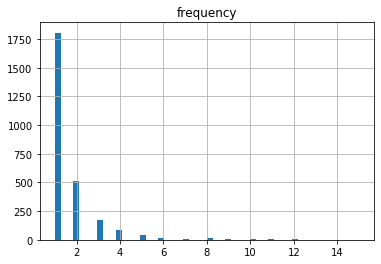

In [284]:

import matplotlib.pyplot as plt
df_frequency.hist(column='frequency', bins=50)


Out of 2682 people who ordered within 90 days of placinng their first order:
    1. More than 1750 ordered 1 time.
    2. 500 orderd 2 times.
    3. and so on 

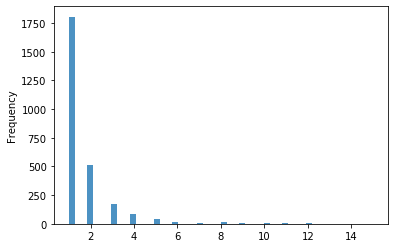

In [287]:
 ax = df_frequency['frequency'].plot.hist(bins=50, alpha=0.8)


THANK YOU